A notebook for capturing calibration data for the cameras of the OROCHI Simualtor of the Kameda Lab.

Fourth round of experiments after procedure upgrade adding 8th camera, and switching some camera positions.

Using a gain of 4.27 dB to raise apparent full well to 20000 e-, and sensitivity to 4.88 e-/DN.
Reducing Blacklevel to 8 DN from 128 DN, to increase sensitive range.

# Process Overview

The objective of this notebook is to capture uniformly illuminated and dark images (across the sampling area) that can be used to characterise each camera of the OROCHI simulator, in terms of:
- Linearity
- Read Noise
- Gain
- FPN
- Dark Signal

To do this, we will  capture images of the 99% Reflectance Spectralon Calibration Target (SCT99) and the 5% Reflectance Spectral Calibration Target (SCT5), and images without illumination, at exposures that range from the minimum possible with the cameras (~5 µs) up to a maximum, defined such that all pixels of the image are saturated (DN=255).

For each exposure, we will capture:
- 2 illuminated images of the target
- 25 dark images (to reduce read noise by factor of 5)

We will choose exposures with the following procedure:
1. Start at minimum exposure - capture pair, record exposure
2. Double exposure - capture pair, record exposure
3. Repeat until all pixels are saturated - i.e. all = 255
4. Reduce exposure by factor of 0.90, and repeat, until 0 pixels are saturated.

This process will be repeated for SCT99 and SCT5, and then again for dark images.
Then, 25 dark frames will be captured for each exposure, and the mean and standard deviation TIFF float images recorded.


# Camera Setup

Here we configure and setup the camera capture objects.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import orochi_sim_ctrl as osc

ic = osc.start_ic()
camera_config = osc.load_camera_config()
cameras = osc.connect_cameras(ic, camera_config)
osc.configure_cameras(cameras)

Device 0 (DMK 33GX249 10910288) succesfully connected.
Device 1 (DMK 33GX249 10910273) succesfully connected.
Device 2 (DMK 33GX249 10910289) succesfully connected.
Device 3 (DMK 33GX249 10910294) succesfully connected.
Device 4 (DMK 33GX249 10910291) succesfully connected.
Device 5 (DMK 33GX249 10910295) succesfully connected.
Device 7 (DMK 33GX249 23120778) succesfully connected.
Device 6 (DMK 33GX249 10910265) succesfully connected.
-----------------------------------
Device 0 (DMK 33GX249 10910288)
-----------------------------------
1
Video Format set to : Y16 (1920x1200)
1
Sink Format set to : "SinkFormats.Y16"
Frame Rate set to : 30.0 FPS
Brightness Value set to 8
Contrast Value set to 0
Sharpness Value set to 0
Gamma Value set to 100
Gain Value set to 4.269999980926514
Gain Auto set to 0
Exposure Value set to 0.009999999776482582
Exposure Auto set to 1
Exposure Auto Reference set to 80
Exposure Auto Max Value set to 10.0
Exposure Auto Max Auto set to 0
Trigger Enable set to 0
D

In [3]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from time import sleep

Here we are only going to process images over the calibration target itself, so we restrict the ROI to a very small field of 32x32 pixels.
Statistics are therfore computed over 1024 pixels in each case.

-----------------------------------
Device 0 (DMK 33GX249 10910288)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1724.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.003799536032602191
Exposure set to 0.0037990000564604998 (err of 5.360868848051058e-07
Trial 1:
Imaging with Exposure: 0.0037990000564604998 s
+Good exposure 0.0037990000564604998 Image recieved
Quantile: 3221.0, Target: 3275.2000000000003
Exposure current Value: 0.0037990000564604998
Exposure Value set to 0.003862926037982106
Exposure set to 0.0038620000705122948 (err of 9.260347095091902e-07
Trial 2:
Imaging with Exposure: 0.0038620000705122948 s
+Good exposure 0.0038620000705122948 Image recieved
Quantile: 3291.0, Target: 3275.2000000000003
Exposure current Value: 0.00386200007

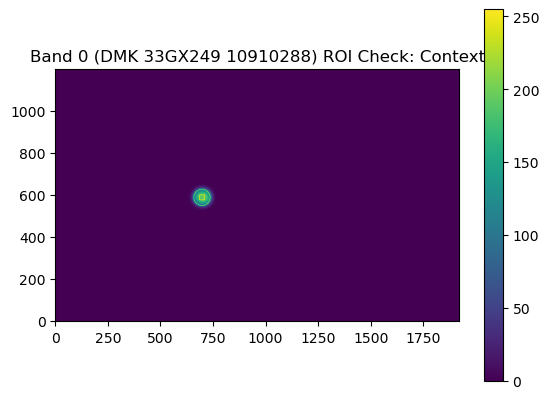

Imaging with Exposure: 0.003855000017210841 s
+Good exposure 0.003855000017210841 Image recieved


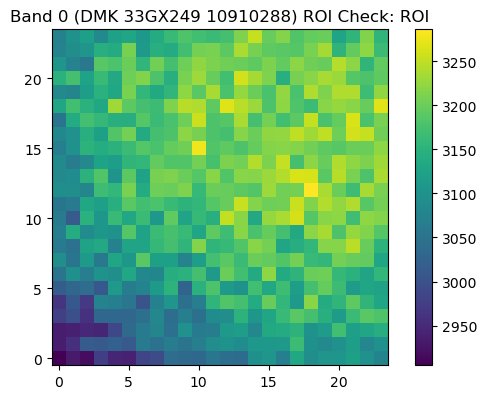

-----------------------------------
-----------------------------------
Device 1 (DMK 33GX249 10910273)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1170.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.0055986326187849045
Exposure set to 0.005597999785095453 (err of 6.329594577992106e-07
Trial 1:
Imaging with Exposure: 0.005597999785095453 s
+Good exposure 0.005597999785095453 Image recieved
Quantile: 3209.0, Target: 3275.2000000000003
Exposure current Value: 0.005597999785095453
Exposure Value set to 0.005713483784347773
Exposure set to 0.00571299996227026 (err of 4.836451291262422e-07
Trial 2:
Imaging with Exposure: 0.00571299996227026 s
+Good exposure 0.00571299996227026 Image recieved
Quantile: 3279.0, Target: 3275.2000000000003
Exposure c

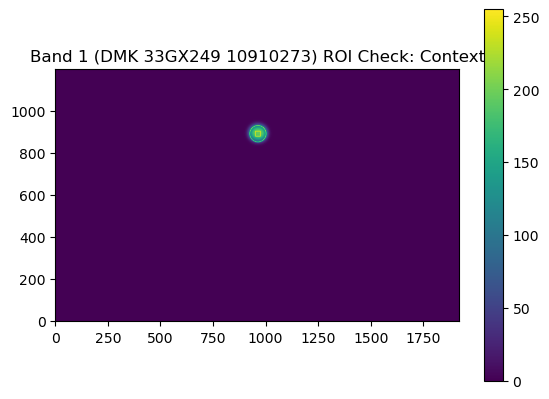

Imaging with Exposure: 0.005696999840438366 s
+Good exposure 0.005696999840438366 Image recieved


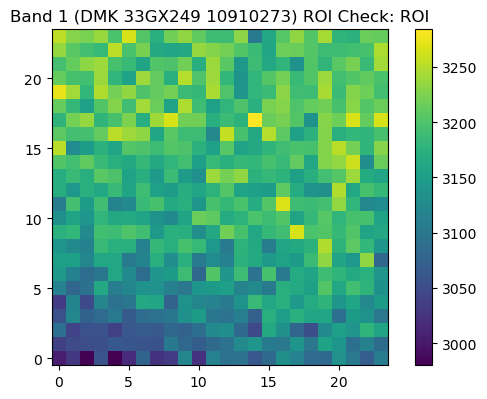

-----------------------------------
-----------------------------------
Device 2 (DMK 33GX249 10910289)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 3586.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.0018266593106091022
Exposure set to 0.0018260000506415963 (err of 6.592664602736269e-07
Trial 1:
Imaging with Exposure: 0.0018260000506415963 s
+Good exposure 0.0018260000506415963 Image recieved
Quantile: 3258.0, Target: 3275.2000000000003
Exposure current Value: 0.0018260000506415963
Exposure Value set to 0.0018356400541961193
Exposure set to 0.0018350000027567148 (err of 6.400727071763194e-07
Trial 2:
Imaging with Exposure: 0.0018350000027567148 s
+Good exposure 0.0018350000027567148 Image recieved
Quantile: 3300.0, Target: 3275.2000000000003

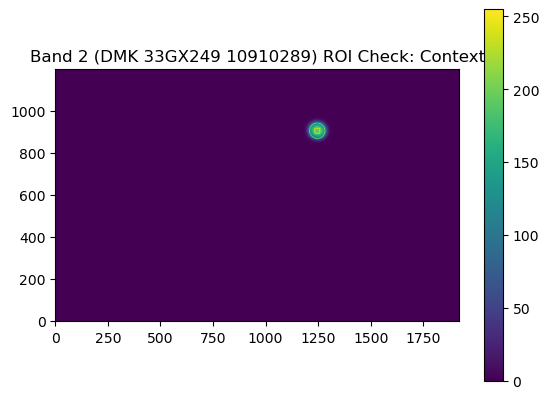

Imaging with Exposure: 0.0018279999494552612 s
+Good exposure 0.0018279999494552612 Image recieved


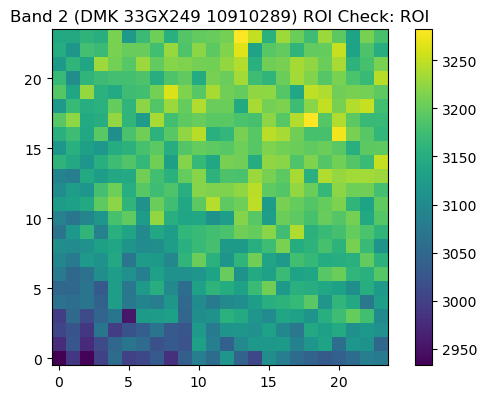

-----------------------------------
-----------------------------------
Device 3 (DMK 33GX249 10910294)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 635.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.010315591469407082
Exposure set to 0.0103150000795722 (err of 5.909615731613388e-07
Trial 1:
Imaging with Exposure: 0.0103150000795722 s
+Good exposure 0.0103150000795722 Image recieved
Quantile: 3169.0, Target: 3275.2000000000003
Exposure current Value: 0.0103150000795722
Exposure Value set to 0.010660678148269653
Exposure set to 0.010660000145435333 (err of 6.777531493546568e-07
Trial 2:
Imaging with Exposure: 0.010660000145435333 s
+Good exposure 0.010660000145435333 Image recieved
Quantile: 3280.0, Target: 3275.2000000000003
Exposure current 

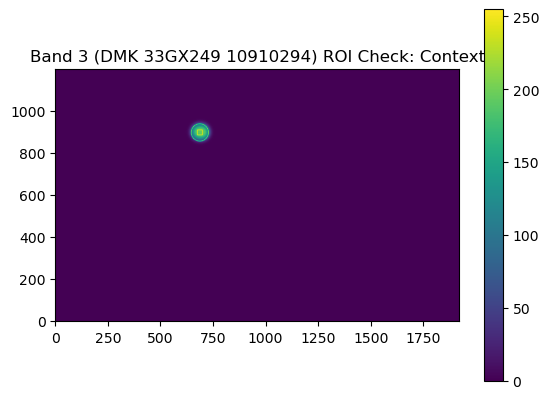

Imaging with Exposure: 0.010672999545931816 s
+Good exposure 0.010672999545931816 Image recieved


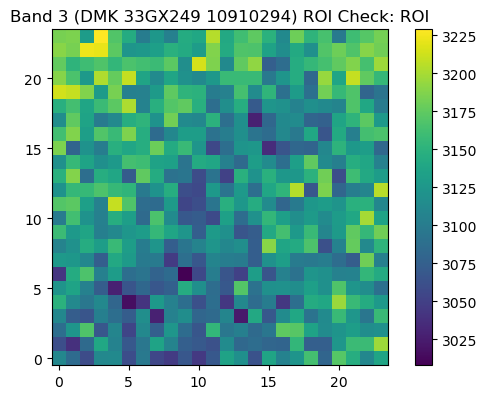

-----------------------------------
-----------------------------------
Device 4 (DMK 33GX249 10910291)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1880.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.003484255401417613
Exposure set to 0.0034839999862015247 (err of 2.554984406587593e-07
Trial 1:
Imaging with Exposure: 0.0034839999862015247 s
+Good exposure 0.0034839999862015247 Image recieved
Quantile: 3214.0, Target: 3275.2000000000003
Exposure current Value: 0.0034839999862015247
Exposure Value set to 0.0035503413528203964
Exposure set to 0.0035500000230968 (err of 3.4121984260164495e-07
Trial 2:
Imaging with Exposure: 0.0035500000230968 s
+Good exposure 0.0035500000230968 Image recieved
Quantile: 3295.0, Target: 3275.2000000000003
Exposure

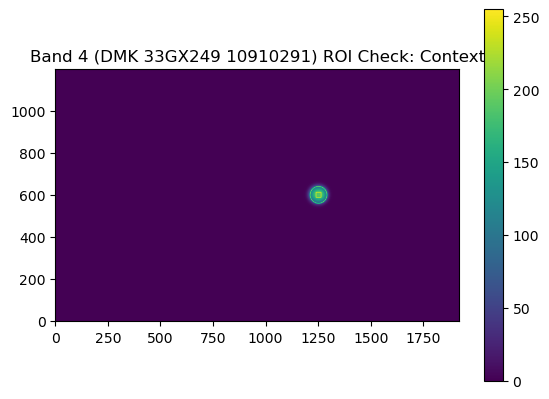

Imaging with Exposure: 0.0035379999317228794 s
+Good exposure 0.0035379999317228794 Image recieved


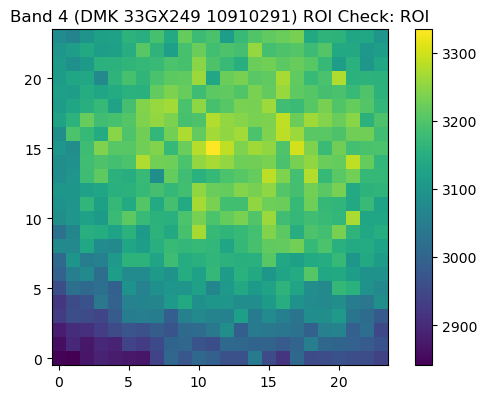

-----------------------------------
-----------------------------------
Device 5 (DMK 33GX249 10910295)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 713.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.009187097661197186
Exposure set to 0.009186999872326851 (err of 9.733823037871847e-08
Trial 1:
Imaging with Exposure: 0.009186999872326851 s
+Good exposure 0.009186999872326851 Image recieved
Quantile: 3191.0, Target: 3275.2000000000003
Exposure current Value: 0.009186999872326851
Exposure Value set to 0.009429414756596088
Exposure set to 0.009429000318050385 (err of 4.1427983269413937e-07
Trial 2:
Imaging with Exposure: 0.009429000318050385 s
+Good exposure 0.009429000318050385 Image recieved
Quantile: 3262.0, Target: 3275.2000000000003
Exposure

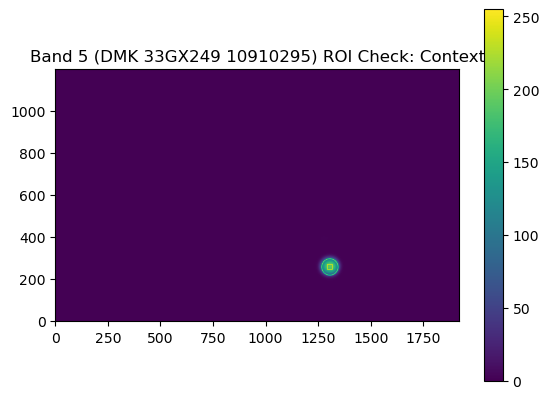

Imaging with Exposure: 0.009482000023126602 s
+Good exposure 0.009482000023126602 Image recieved


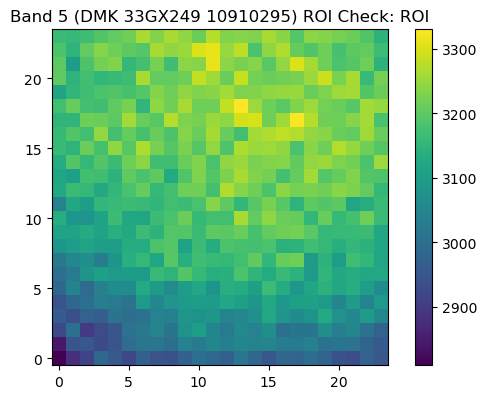

-----------------------------------
-----------------------------------
Device 7 (DMK 33GX249 23120778)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 354.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.09251977503299713
Exposure set to 0.09251900017261505 (err of 7.782331378630714e-07
Trial 1:
Imaging with Exposure: 0.09251900017261505 s
+Good exposure 0.09251900017261505 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.09251900017261505
Exposure Value set to 0.014803039841353893
Exposure set to 0.014802999794483185 (err of 4.0233135224429506e-08
Trial 2:
Imaging with Exposure: 0.014802999794483185 s
+Good exposure 0.014802999794483185 Image recieved
Quantile: 2492.0, Target: 3275.2000000000003
Exposure curr

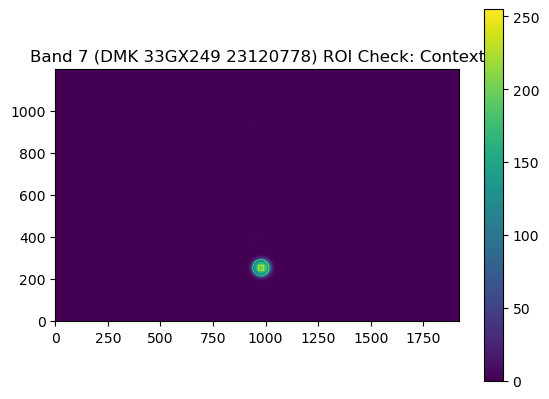

Imaging with Exposure: 0.019587000831961632 s
+Good exposure 0.019587000831961632 Image recieved


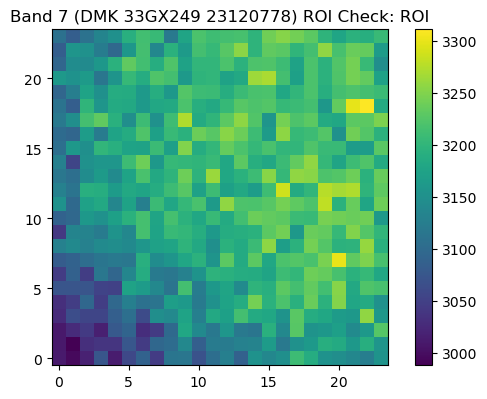

-----------------------------------
-----------------------------------
Device 6 (DMK 33GX249 10910265)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 3891.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.001683474751189351
Exposure set to 0.0016830000095069408 (err of 4.747556247232561e-07
Trial 1:
Imaging with Exposure: 0.0016830000095069408 s
+Good exposure 0.0016830000095069408 Image recieved
Quantile: 3271.0, Target: 3275.2000000000003
Exposure current Value: 0.0016830000095069408
Exposure Value set to 0.0016851610271260142
Exposure set to 0.0016850000247359276 (err of 1.6097530599647192e-07
Trial 2:
Imaging with Exposure: 0.0016850000247359276 s
+Good exposure 0.0016850000247359276 Image recieved
Quantile: 3271.0, Target: 3275.2000000000003

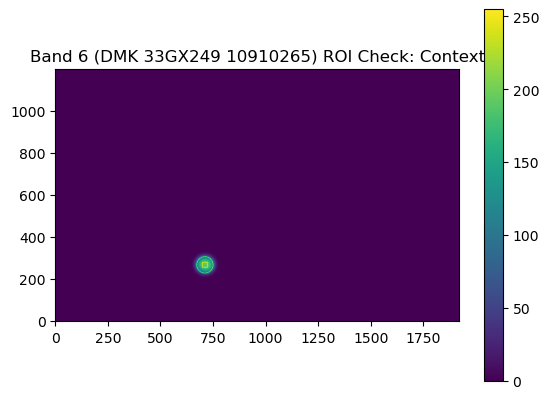

Imaging with Exposure: 0.0016700000269338489 s
+Good exposure 0.0016700000269338489 Image recieved


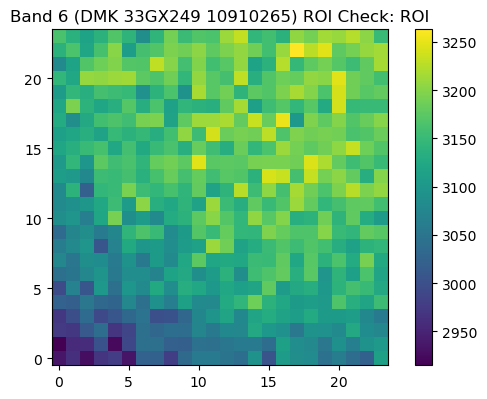

-----------------------------------


In [4]:
osc.find_camera_rois(cameras, roi_size=24)

-----------------------------------
Device 0
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1726.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.00379513343796134
Exposure set to 0.0037950000260025263 (err of 1.3341034006122618e-07
Trial 1:
Imaging with Exposure: 0.0037950000260025263 s
+Good exposure 0.0037950000260025263 Image recieved
Quantile: 3229.0, Target: 3275.2000000000003
Exposure current Value: 0.0037950000260025263
Exposure Value set to 0.0038492982275784016
Exposure set to 0.003848999971523881 (err of 2.9828959828559487e-07
Trial 2:
Imaging with Exposure: 0.003848999971523881 s
+Good exposure 0.003848999971523881 Image recieved
Quantile: 3278.0, Target: 3275.2000000000003
Exposure current Value: 0.003848999971523881
Exposure Value s

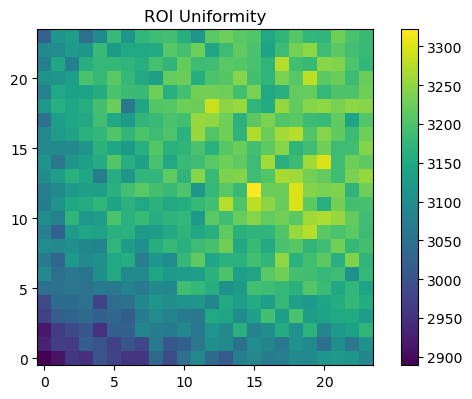

ROI Uniformity: 2.24282705030162 %
-----------------------------------
-----------------------------------
Device 1
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1170.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.0055986326187849045
Exposure set to 0.005597999785095453 (err of 6.329594577992106e-07
Trial 1:
Imaging with Exposure: 0.005597999785095453 s
+Good exposure 0.005597999785095453 Image recieved
Quantile: 3207.0, Target: 3275.2000000000003
Exposure current Value: 0.005597999785095453
Exposure Value set to 0.005717046558856964
Exposure set to 0.005716999992728233 (err of 4.6747572555148886e-08
Trial 2:
Imaging with Exposure: 0.005716999992728233 s
+Good exposure 0.005716999992728233 Image recieved
Quantile: 3281.0, Target: 3275.20000000

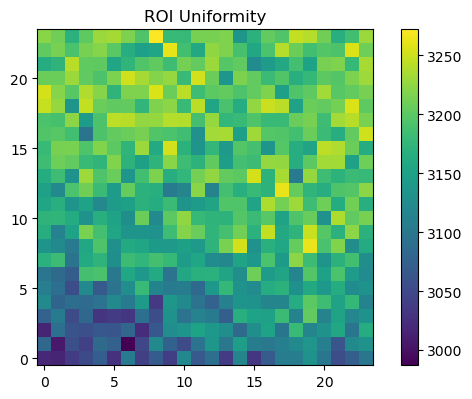

ROI Uniformity: 1.663527176537343 %
-----------------------------------
-----------------------------------
Device 2
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 3580.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.001829720800742507
Exposure set to 0.0018289999570697546 (err of 7.208002283753782e-07
Trial 1:
Imaging with Exposure: 0.0018289999570697546 s
+Good exposure 0.0018289999570697546 Image recieved
Quantile: 3253.0, Target: 3275.2000000000003
Exposure current Value: 0.0018289999570697546
Exposure Value set to 0.0018414818914607167
Exposure set to 0.001841000048443675 (err of 4.818634514560435e-07
Trial 2:
Imaging with Exposure: 0.001841000048443675 s
+Good exposure 0.001841000048443675 Image recieved
Quantile: 3305.0, Target: 3275.2000

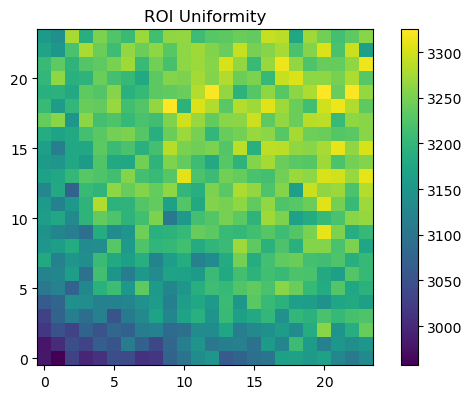

ROI Uniformity: 2.0352762051076194 %
-----------------------------------
-----------------------------------
Device 3
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 636.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.010299371555447578
Exposure set to 0.010298999957740307 (err of 3.716006359601176e-07
Trial 1:
Imaging with Exposure: 0.010298999957740307 s
+Good exposure 0.010298999957740307 Image recieved
Quantile: 3172.0, Target: 3275.2000000000003
Exposure current Value: 0.010298999957740307
Exposure Value set to 0.010634074918925762
Exposure set to 0.010634000413119793 (err of 7.419646124579016e-08
Trial 2:
Imaging with Exposure: 0.010634000413119793 s
+Good exposure 0.010634000413119793 Image recieved
Quantile: 3271.0, Target: 3275.200000000

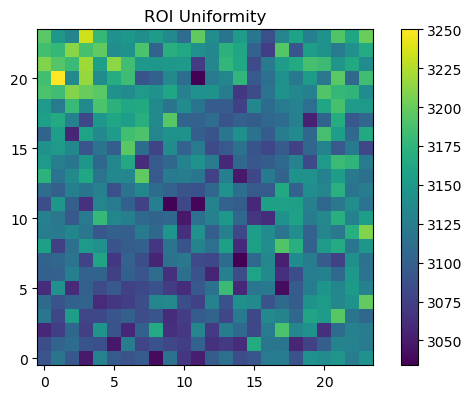

ROI Uniformity: 1.1885732457435185 %
-----------------------------------
-----------------------------------
Device 4
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1880.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.003484255401417613
Exposure set to 0.0034839999862015247 (err of 2.554984406587593e-07
Trial 1:
Imaging with Exposure: 0.0034839999862015247 s
+Good exposure 0.0034839999862015247 Image recieved
Quantile: 3222.0, Target: 3275.2000000000003
Exposure current Value: 0.0034839999862015247
Exposure Value set to 0.0035415259189903736
Exposure set to 0.0035409999545663595 (err of 5.260400975865345e-07
Trial 2:
Imaging with Exposure: 0.0035409999545663595 s
+Good exposure 0.0035409999545663595 Image recieved
Quantile: 3261.0, Target: 3275.

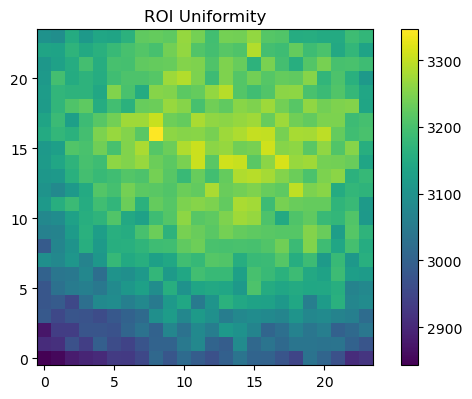

ROI Uniformity: 2.9526638839962622 %
-----------------------------------
-----------------------------------
Device 5
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 708.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.009251978248357773
Exposure set to 0.009251000359654427 (err of 9.774809208631247e-07
Trial 1:
Imaging with Exposure: 0.009251000359654427 s
+Good exposure 0.009251000359654427 Image recieved
Quantile: 3198.0, Target: 3275.2000000000003
Exposure current Value: 0.009251000359654427
Exposure Value set to 0.009474320337176323
Exposure set to 0.009473999962210655 (err of 3.203560945911482e-07
Trial 2:
Imaging with Exposure: 0.009473999962210655 s
+Good exposure 0.009473999962210655 Image recieved
Quantile: 3282.0, Target: 3275.200000000

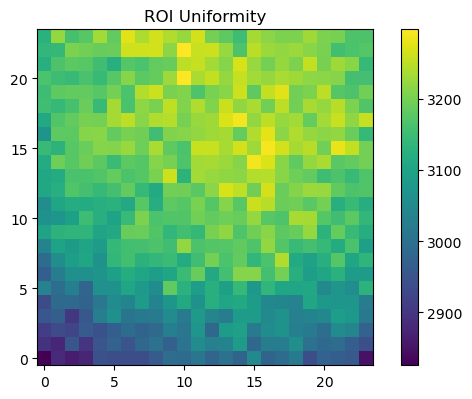

ROI Uniformity: 2.891059369123932 %
-----------------------------------
-----------------------------------
Device 7
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 353.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.09278187155723572
Exposure set to 0.09278099983930588 (err of 8.742559817476181e-07
Trial 1:
Imaging with Exposure: 0.09278099983930588 s
+Good exposure 0.09278099983930588 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.09278099983930588
Exposure Value set to 0.01484495960175991
Exposure set to 0.014844000339508057 (err of 9.59634780884136e-07
Trial 2:
Imaging with Exposure: 0.014844000339508057 s
+Good exposure 0.014844000339508057 Image recieved
Quantile: 2503.0, Target: 3275.2000000000003
Exp

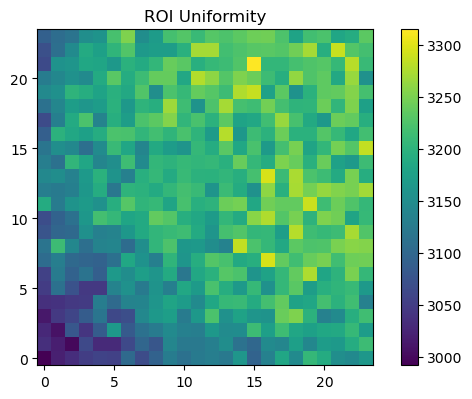

ROI Uniformity: 1.7757446258485228 %
-----------------------------------
-----------------------------------
Device 6
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 3907.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.0016765805194154382
Exposure set to 0.0016759999562054873 (err of 5.806199724768101e-07
Trial 1:
Imaging with Exposure: 0.0016759999562054873 s
+Good exposure 0.0016759999562054873 Image recieved
Quantile: 3283.0, Target: 3275.2000000000003
Exposure current Value: 0.0016759999562054873
Exposure Value set to 0.001672017970122397
Exposure set to 0.0016720000421628356 (err of 1.794643424406911e-08
Trial 2:
Imaging with Exposure: 0.0016720000421628356 s
+Good exposure 0.0016720000421628356 Image recieved
Quantile: 3275.0, Target: 3275.

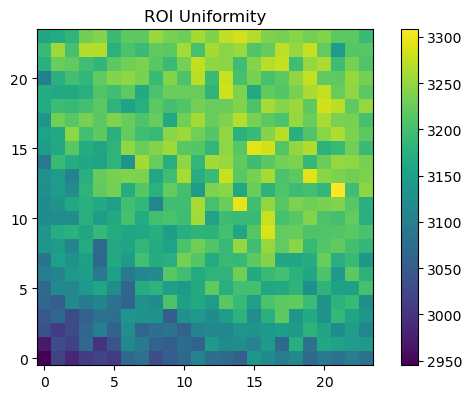

ROI Uniformity: 1.9095857823765006 %
-----------------------------------


In [5]:
osc.check_channel_roi_uniformity(cameras)

# Calibration Functions

Here we define simple functions for controlling the cameras during the calibration routines.

In [6]:
def camera_calibration_sequence(camera, subject) -> pd.DataFrame:
    """Capture pairs of images with increasing exposure time until all
    pixels are saturated, then decrease exposure time until no pixels are 
    saturated.
    
    Args:
        camera: Camera object to capture images from.
    
    Returns:
        DataFrame with columns:
            - exposure
            - mean
            - std
    """
    camera.set_property('Exposure', 'Auto', 0, 'Switch')        
    t_min = 1.0/16666 # (seconds) verify that this is the minimum exposure time
    t_max = 50.0
    t_exp = t_min
    up_scale = 1.2
    dwn_scale = 0.99
    t_scale = up_scale
    img_type='calibration'
    stop = False    
    cmd_exposures = []
    exposures = []
    means = []
    stds = []
    shots = []
    sat_val = camera.max_dn
    while stop is False:
        print(f'Exposure: {t_exp:.7f} s')
        camera.set_property('Exposure', 'Value', t_exp, 'AbsoluteValue')
        img_1 = camera.image_capture(roi=True)
        img_2 = camera.image_capture(roi=True)
        name_1 = f'{t_exp*1E6:.0f}us_1'
        name_2 = f'{t_exp*1E6:.0f}us_2'
        camera.save_image(name_1, subject, img_type, img_1)
        camera.save_image(name_2, subject, img_type, img_2)
        exposures.append(camera.get_exposure_value())
        cmd_exposures.append(t_exp)
        mean = np.mean([np.mean(img_1), np.mean(img_2)])
        std = np.mean([np.std(img_1), np.std(img_2)])
        shot = np.sqrt(np.mean((img_1 - img_2)**2)/2)
        means.append(mean)
        stds.append(std)
        shots.append(shot)
        if mean >= sat_val * 0.999:
            t_scale = dwn_scale
        if t_scale == dwn_scale:
            # n_sat = (np.sum(img_1 == sat_val) + np.sum(img_2 == sat_val)) / 2
            if mean <= sat_val * 0.80:
                stop = True
        else:
            if t_exp*t_scale > t_max:
                t_scale = dwn_scale
        t_exp = t_exp * t_scale

    results = pd.DataFrame({'exposure': exposures, 'raw mean': means, 'raw standard deviation': stds, 'shot and read noise': shots})
    results.sort_values('exposure', inplace=True)

    print(results)

    cwl_str = str(int(camera.camera_props['cwl']))
    channel = str(camera.camera_props['number'])+'_'+cwl_str
    subject_dir = Path('..', 'data', subject, channel)
    subject_dir.mkdir(parents=True, exist_ok=True)
    filename = 'exposures.csv'
    img_file =str(Path(subject_dir, filename).with_suffix('.tif'))

    results['exposure'].to_csv(f'{subject}_exposures.csv', index=False)

    fig, ax = plt.subplots(2,1, figsize=(5,10))
    ax[0].plot(results['exposure'], results['raw mean'])
    ax[0].set_xlabel('Exposure (s)')
    ax[0].set_ylabel('Mean Pixel Value')
    results.sort_values('raw mean', inplace=True)
    ax[1].loglog(results['raw mean'], results['raw standard deviation'], label='Total Noise')
    ax[1].loglog(results['raw mean'], results['shot and read noise'], label='Shot and Read Noise')
    ax[1].set_xlabel('Mean Pixel Value')
    ax[1].set_ylabel('Standard Deviation')
    plt.show()
    return cmd_exposures

# SCT99 Procedure

Output:
- SCT99 Exposure List
- SCT99 Lit Image Directory

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99\0_650\650_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99\0_650\650_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99\0_650\650_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99\0_650\650_72us

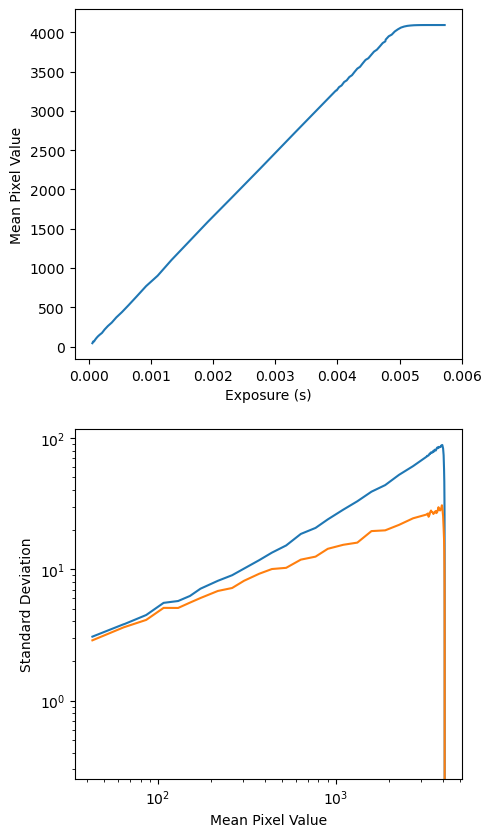

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99\1_475\475_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99\1_475\475_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99\1_475\475_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99\1_475\475_72us

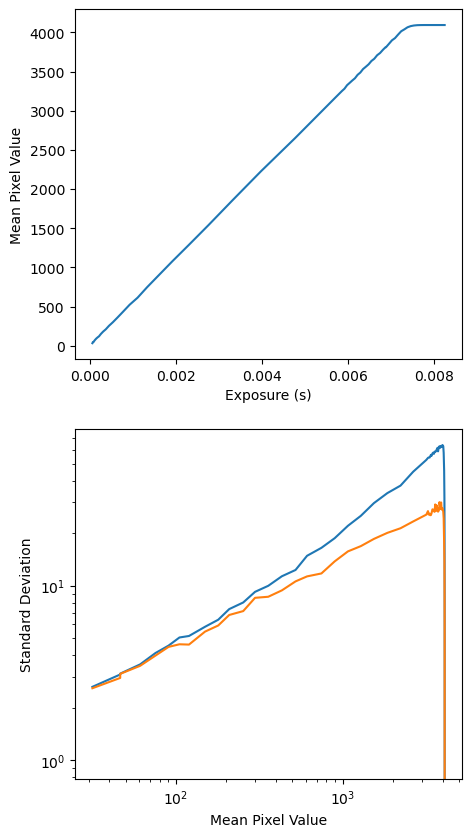

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99\2_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99\2_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99\2_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99\2_550\550_72us

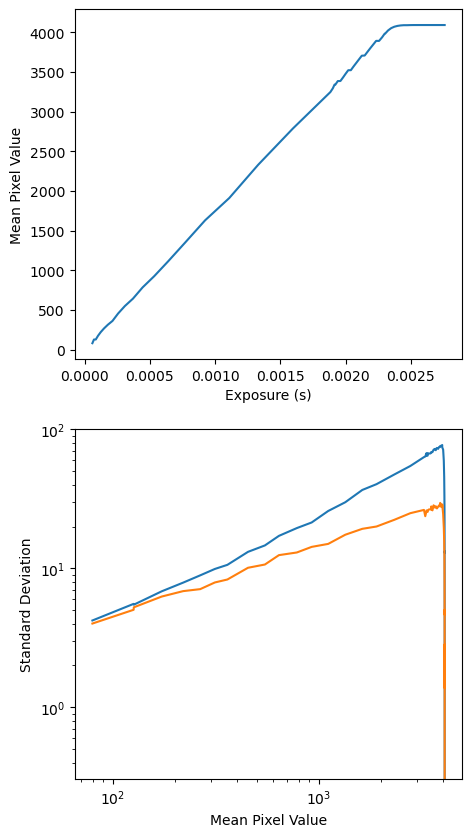

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99\3_400\400_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99\3_400\400_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99\3_400\400_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99\3_400\400_72us

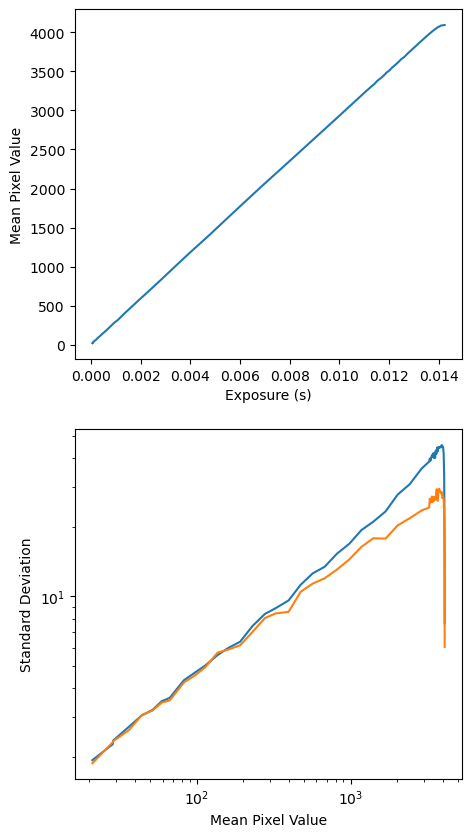

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99\4_725\725_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99\4_725\725_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99\4_725\725_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99\4_725\725_72us

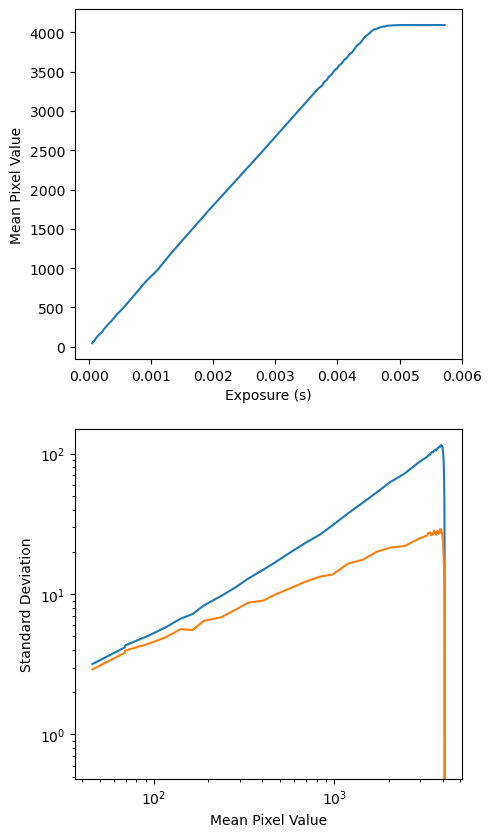

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99\5_850\850_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99\5_850\850_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99\5_850\850_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99\5_850\850_72us

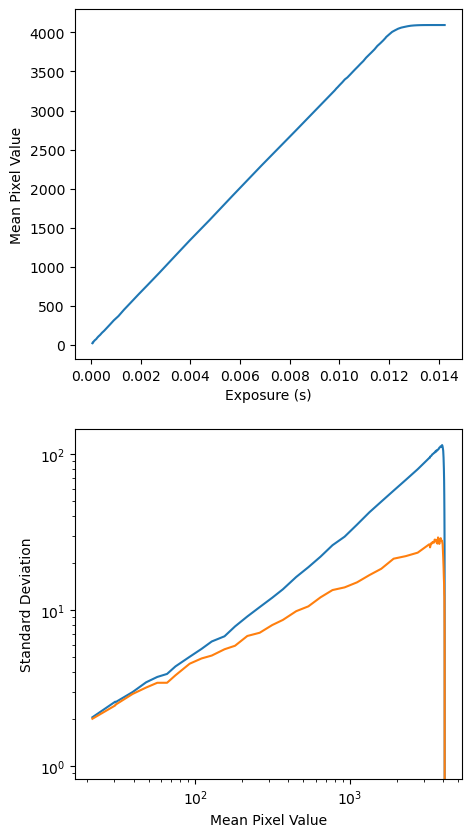

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99\7_950\950_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99\7_950\950_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99\7_950\950_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99\7_950\950_72us

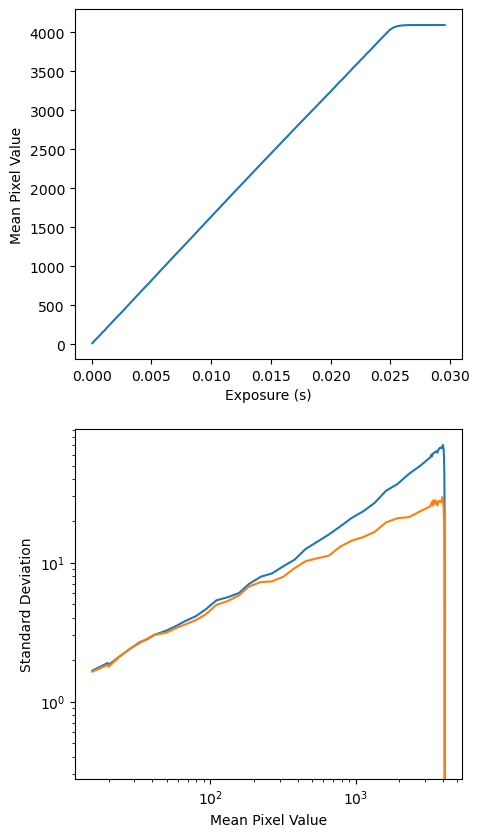

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99\6_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99\6_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99\6_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99\6_550\550_72us

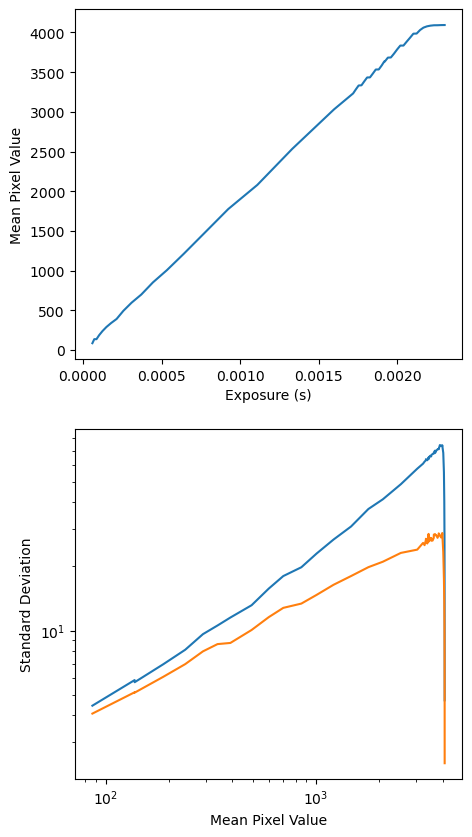

In [7]:
sct99_exposures = {}
for camera in cameras:
    sct99_exposures[camera] = camera_calibration_sequence(camera, 'SCT99')

# SCT5 Procedure

Output:
- SCT5 Exposure List
- SCT5 Lit Image Directory

-----------------------------------
Device 0
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 97.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.33764949440956116
Exposure set to 0.33764898777008057 (err of 5.128034918921998e-07
Trial 1:
Imaging with Exposure: 0.33764898777008057 s
+Good exposure 0.33764898777008057 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.33764898777008057
Exposure Value set to 0.05402383953332901
Exposure set to 0.054023001343011856 (err of 8.367002010331581e-07
Trial 2:
Imaging with Exposure: 0.054023001343011856 s
+Good exposure 0.054023001343011856 Image recieved
Quantile: 2324.0, Target: 3275.2000000000003
Exposure current Value: 0.054023001343011856
Exposure Value set to 0.076134

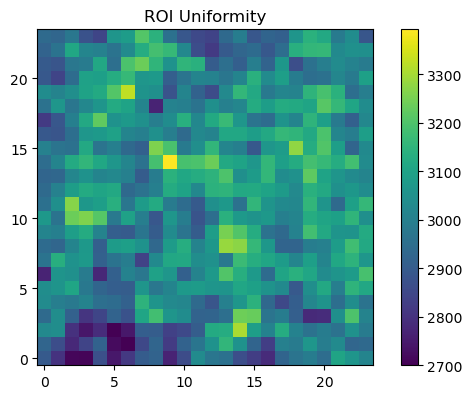

ROI Uniformity: 3.603526841425208 %
-----------------------------------
-----------------------------------
Device 1
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 68.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.4816470742225647
Exposure set to 0.4816470146179199 (err of 6.708261723886721e-08
Trial 1:
Imaging with Exposure: 0.4816470146179199 s
+Good exposure 0.4816470146179199 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.4816470146179199
Exposure Value set to 0.07706352323293686
Exposure set to 0.07706300169229507 (err of 5.206465721191433e-07
Trial 2:
Imaging with Exposure: 0.07706300169229507 s
+Good exposure 0.07706300169229507 Image recieved
Quantile: 2130.0, Target: 3275.2000000000003
Exposure cu

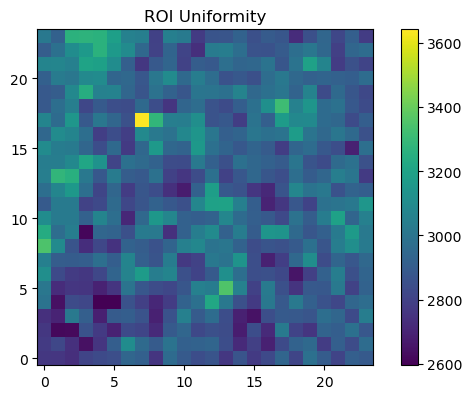

ROI Uniformity: 4.454050361384707 %
-----------------------------------
-----------------------------------
Device 2
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 190.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.17237895727157593
Exposure set to 0.17237800359725952 (err of 9.519587222117654e-07
Trial 1:
Imaging with Exposure: 0.17237800359725952 s
+Good exposure 0.17237800359725952 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.17237800359725952
Exposure Value set to 0.02758048102259636
Exposure set to 0.027580000460147858 (err of 4.801154136653552e-07
Trial 2:
Imaging with Exposure: 0.027580000460147858 s
+Good exposure 0.027580000460147858 Image recieved
Quantile: 2511.0, Target: 3275.2000000000003
Ex

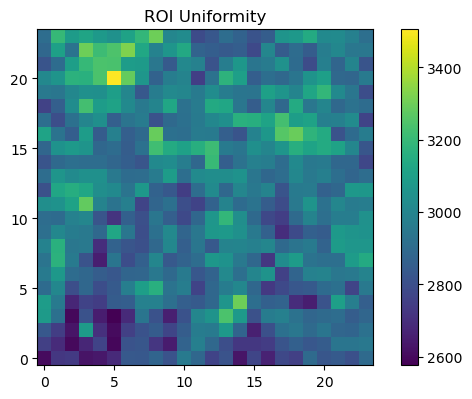

ROI Uniformity: 4.604239702461962 %
-----------------------------------
-----------------------------------
Device 3
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 42.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.7798095345497131
Exposure set to 0.7798089981079102 (err of 5.627405785801898e-07
Trial 1:
Imaging with Exposure: 0.7798089981079102 s
+Good exposure 0.7798089981079102 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.7798089981079102
Exposure Value set to 0.12476944178342819
Exposure set to 0.12476900219917297 (err of 4.374980926563632e-07
Trial 2:
Imaging with Exposure: 0.12476900219917297 s
+Good exposure 0.12476900219917297 Image recieved
Quantile: 1823.0, Target: 3275.2000000000003
Exposure cu

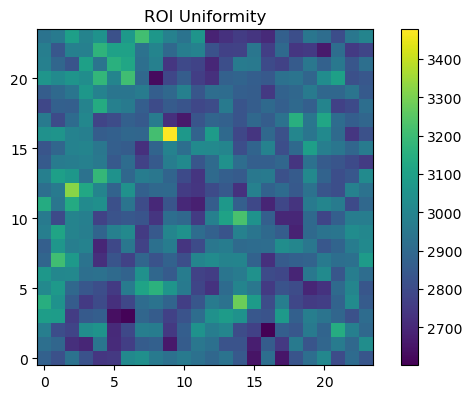

ROI Uniformity: 4.037095292363194 %
-----------------------------------
-----------------------------------
Device 4
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 110.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.2977454662322998
Exposure set to 0.2977449893951416 (err of 4.792924631624729e-07
Trial 1:
Imaging with Exposure: 0.2977449893951416 s
+Good exposure 0.2977449893951416 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.2977449893951416
Exposure Value set to 0.04763919860124588
Exposure set to 0.04763900116086006 (err of 1.9714236259432694e-07
Trial 2:
Imaging with Exposure: 0.04763900116086006 s
+Good exposure 0.04763900116086006 Image recieved
Quantile: 2316.0, Target: 3275.2000000000003
Exposure 

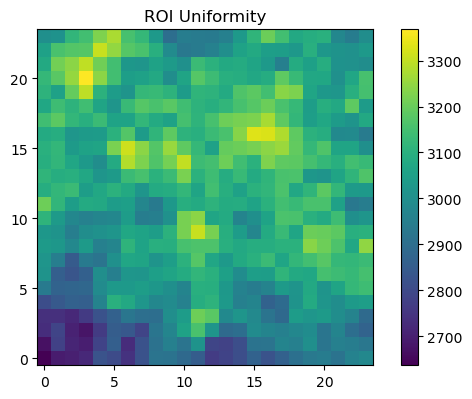

ROI Uniformity: 3.9444771474114986 %
-----------------------------------
-----------------------------------
Device 5
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 52.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.6298461556434631
Exposure set to 0.6298459768295288 (err of 2.0693271218785725e-07
Trial 1:
Imaging with Exposure: 0.6298459768295288 s
-Bad exposure 0.6298459768295288 No image recieved in 5000 ms
Quantile: 1.0, Target: 3275.2000000000003
Exposure current Value: 0.6298459768295288
Exposure Value set to 0.9447689652442932
Exposure set to 0.9447680115699768 (err of 9.5367431640625e-07
Trial 2:
Imaging with Exposure: 0.9447680115699768 s
+Good exposure 0.9447680115699768 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Expos

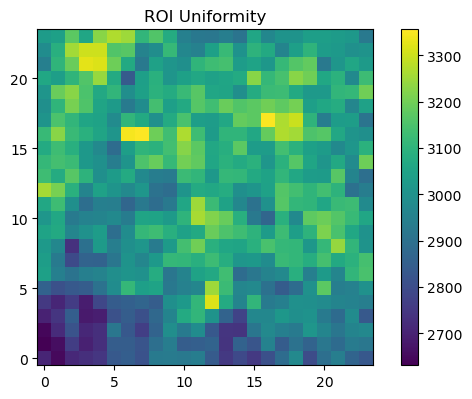

ROI Uniformity: 4.2676540367600175 %
-----------------------------------
-----------------------------------
Device 7
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 32.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 1.0235000848770142
Exposure set to 1.0234999656677246 (err of 8.294591680169106e-08
Trial 1:
Imaging with Exposure: 1.0234999656677246 s
+Good exposure 1.0234999656677246 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 1.0234999656677246
Exposure Value set to 0.1637599915266037
Exposure set to 0.1637589931488037 (err of 1.0013580322432158e-06
Trial 2:
Imaging with Exposure: 0.1637589931488037 s
+Good exposure 0.1637589931488037 Image recieved
Quantile: 1639.0, Target: 3275.2000000000003
Exposure curr

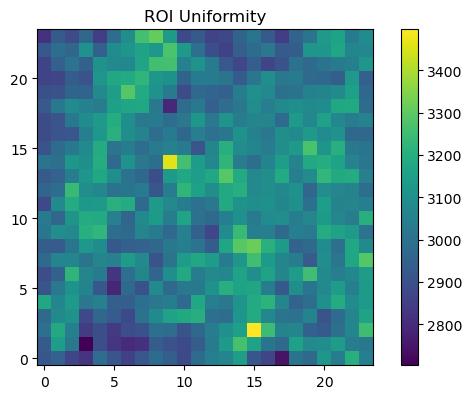

ROI Uniformity: 3.4349985030169803 %
-----------------------------------
-----------------------------------
Device 6
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 201.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.16294528543949127
Exposure set to 0.1629450023174286 (err of 2.79053897406234e-07
Trial 1:
Imaging with Exposure: 0.1629450023174286 s
+Good exposure 0.1629450023174286 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.1629450023174286
Exposure Value set to 0.026071200147271156
Exposure set to 0.02607100084424019 (err of 1.99526548387563e-07
Trial 2:
Imaging with Exposure: 0.02607100084424019 s
+Good exposure 0.02607100084424019 Image recieved
Quantile: 2441.0, Target: 3275.2000000000003
Exposure 

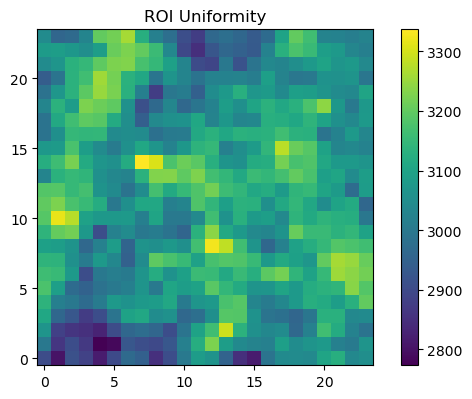

ROI Uniformity: 3.0102288789818847 %
-----------------------------------


In [8]:
osc.check_channel_roi_uniformity(cameras)

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5\0_650\650_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5\0_650\650_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5\0_650\650_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5\0_650\650_72us_2_c

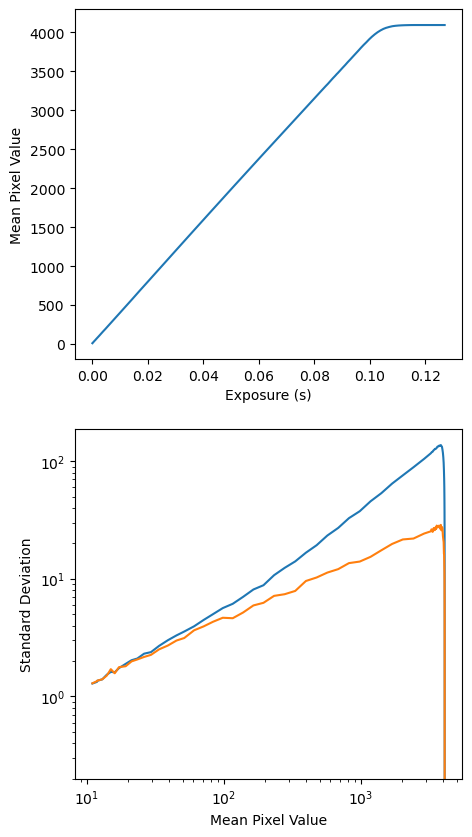

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5\1_475\475_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5\1_475\475_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5\1_475\475_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5\1_475\475_72us_2_c

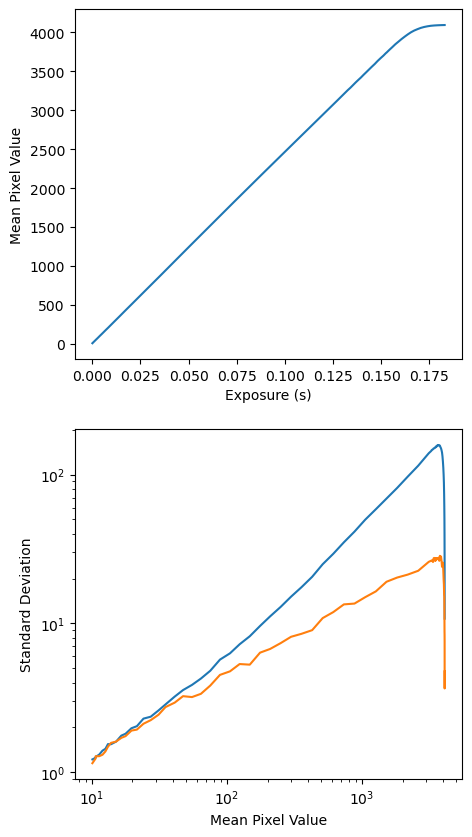

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5\2_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5\2_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5\2_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5\2_550\550_72us_2_c

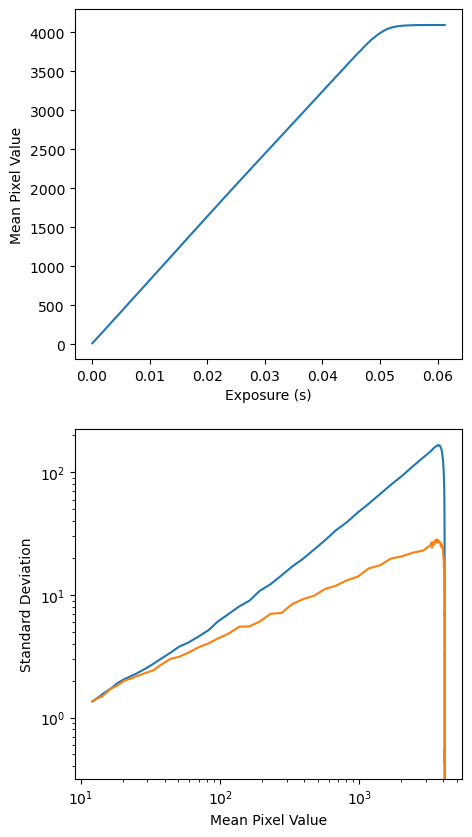

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5\3_400\400_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5\3_400\400_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5\3_400\400_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5\3_400\400_72us_2_c

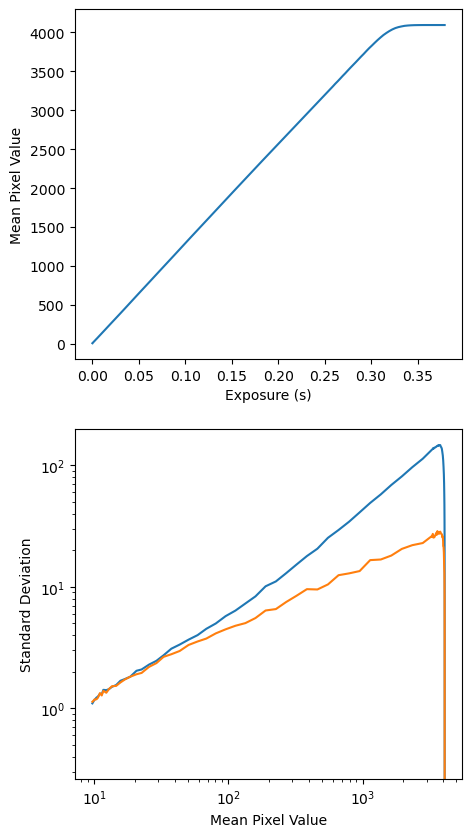

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5\4_725\725_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5\4_725\725_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5\4_725\725_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5\4_725\725_72us_2_c

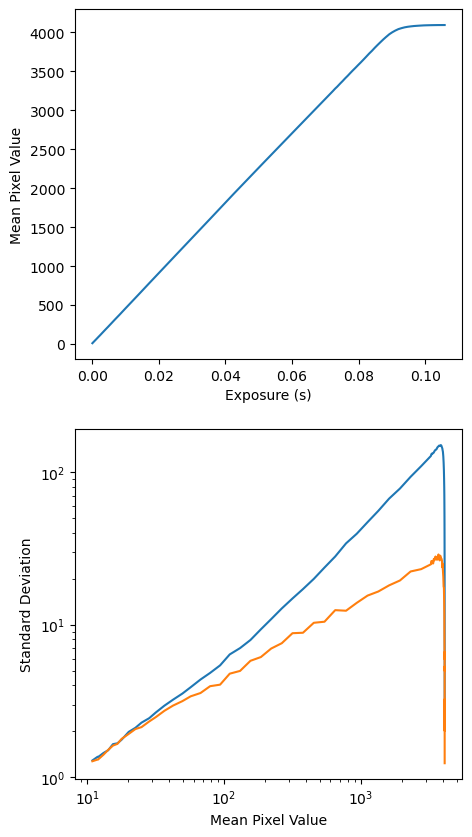

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5\5_850\850_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5\5_850\850_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5\5_850\850_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5\5_850\850_72us_2_c

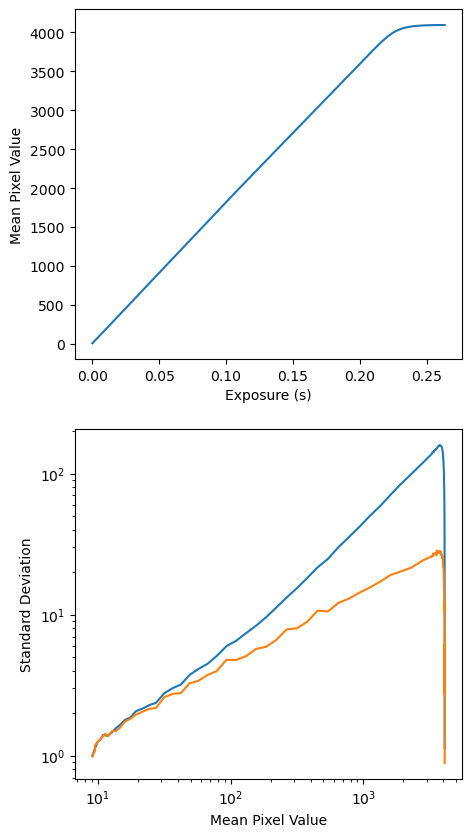

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5\7_950\950_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5\7_950\950_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5\7_950\950_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5\7_950\950_72us_2_c

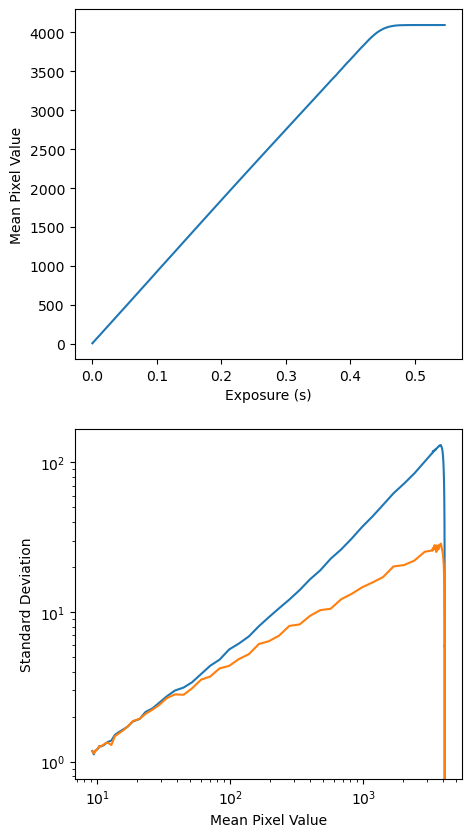

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5\6_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5\6_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5\6_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5\6_550\550_72us_2_c

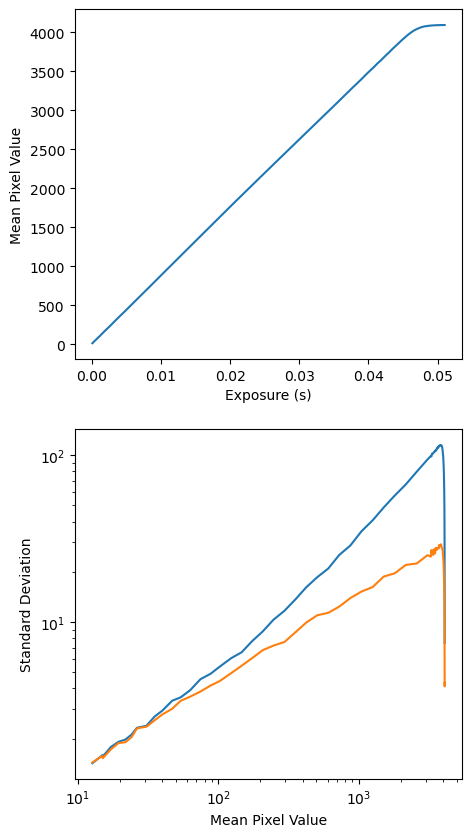

In [9]:
sct5_exposures = {}
for camera in cameras:
    sct5_exposures[camera] = camera_calibration_sequence(camera, 'SCT5')

# Dark Signal Procedure

Output:
- Dark Exposure List
- Dark Image Directory

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark\0_650\650_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark\0_650\650_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark\0_650\650_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\dark\0_650\650_72us_2_c

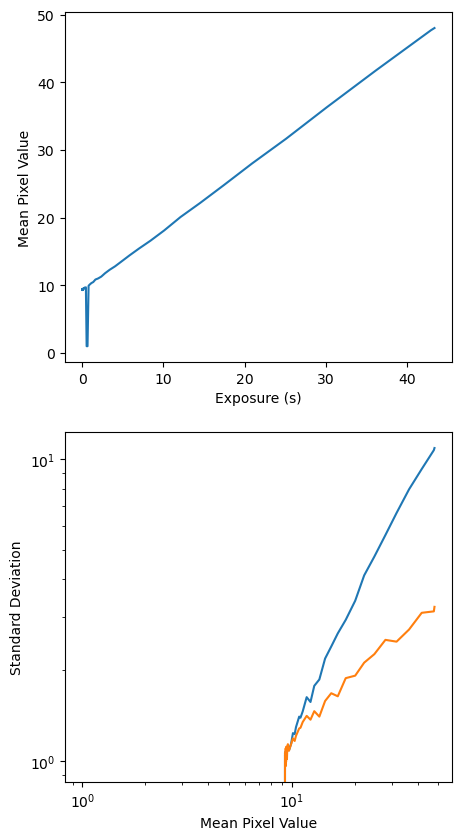

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark\1_475\475_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark\1_475\475_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark\1_475\475_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\dark\1_475\475_72us_2_c

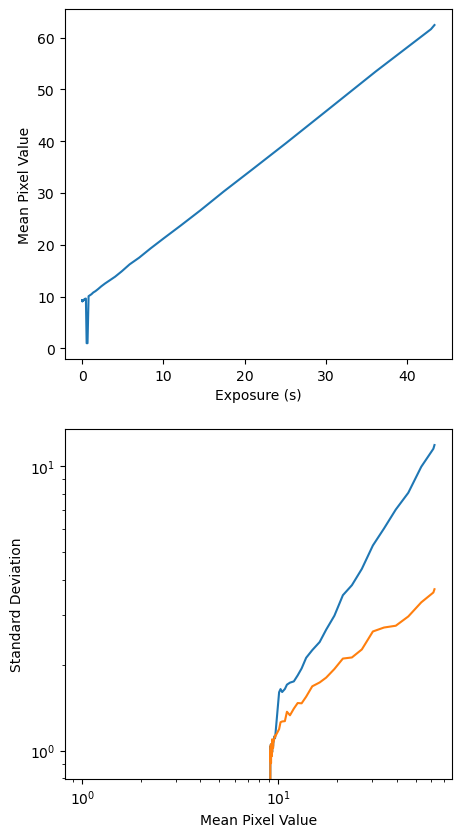

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark\2_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark\2_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark\2_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\dark\2_550\550_72us_2_c

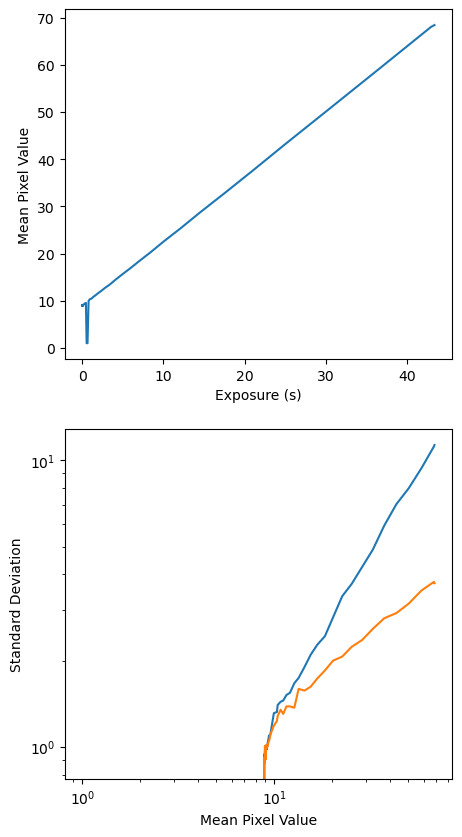

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark\3_400\400_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark\3_400\400_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark\3_400\400_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\dark\3_400\400_72us_2_c

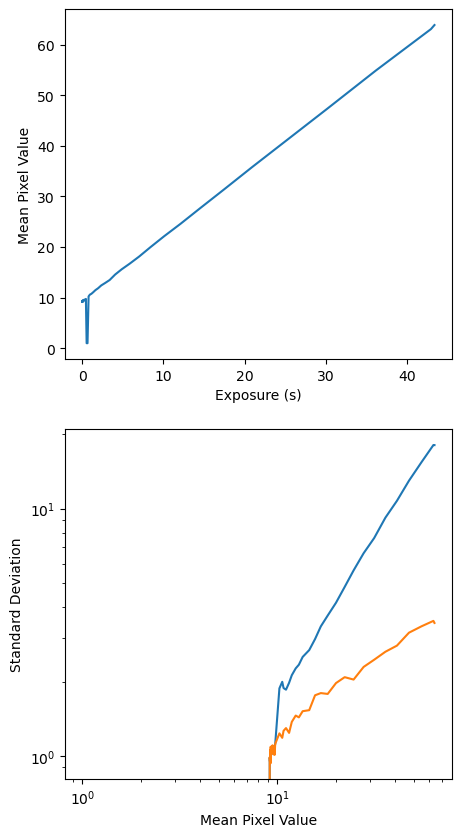

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark\4_725\725_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark\4_725\725_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark\4_725\725_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\dark\4_725\725_72us_2_c

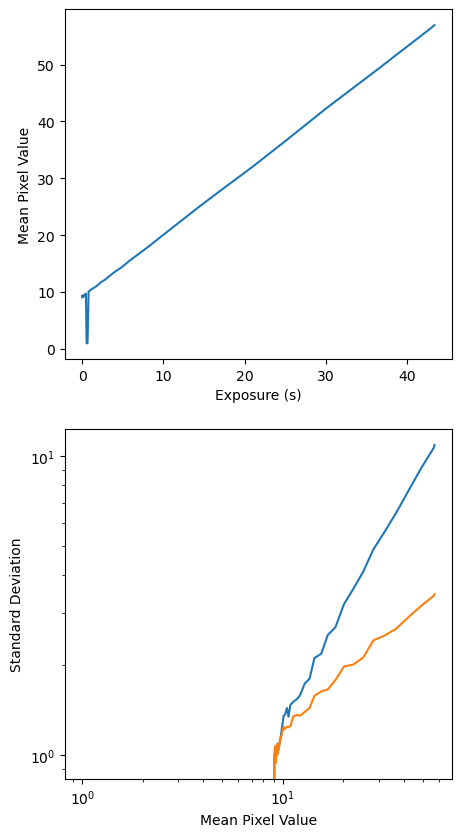

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark\5_850\850_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark\5_850\850_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark\5_850\850_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\dark\5_850\850_72us_2_c

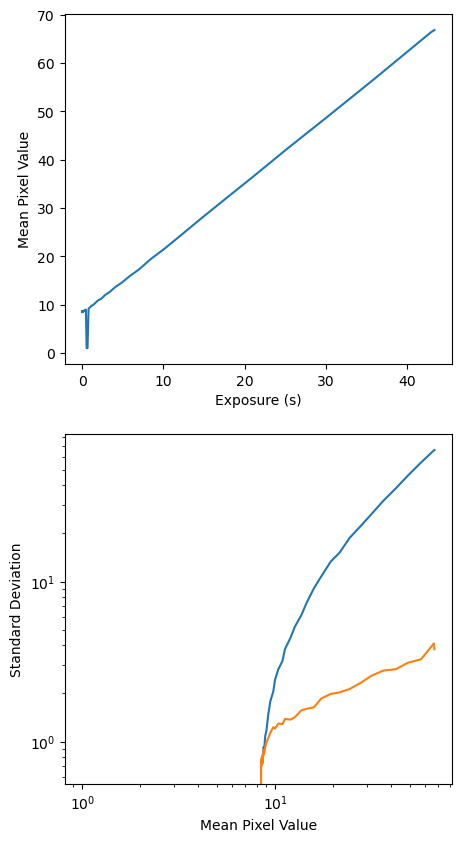

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark\7_950\950_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark\7_950\950_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark\7_950\950_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\dark\7_950\950_72us_2_c

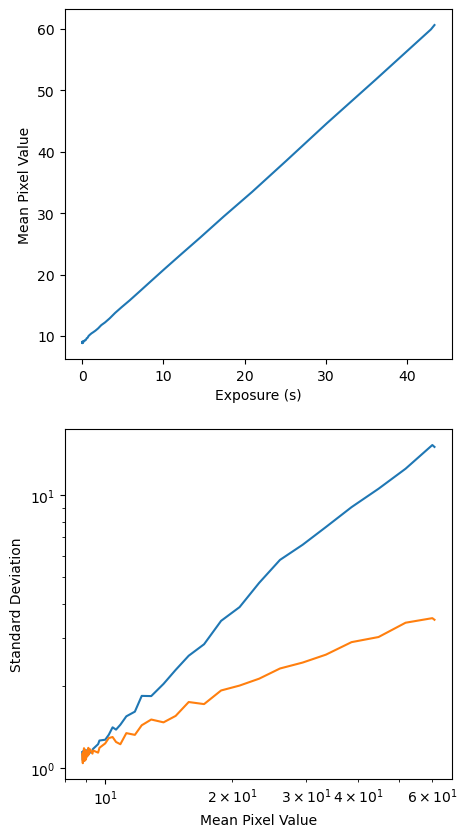

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark\6_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark\6_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark\6_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\dark\6_550\550_72us_2_c

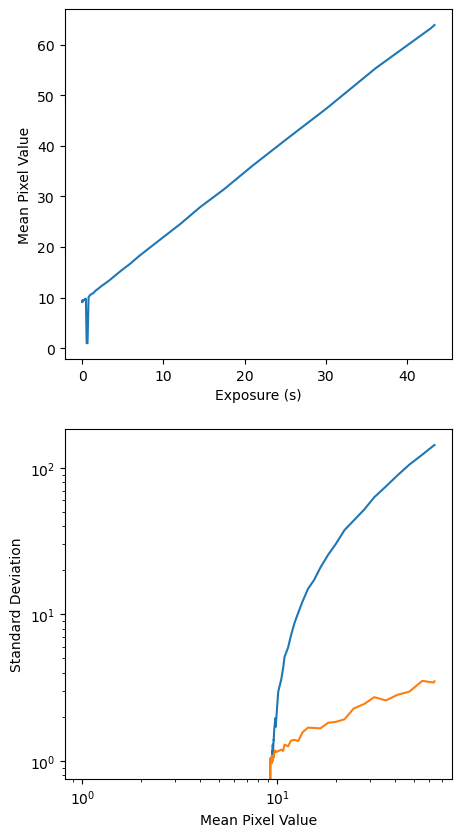

In [12]:
for camera in cameras:
    dark_exposures = camera_calibration_sequence(camera, 'dark')

# Dark Frame Capture

Output:
- addition of dark mean frames to SCT99 directory
- addition of dark mean frames to SCT5 directory

In [10]:
for camera in cameras:
    exposures = sct99_exposures[camera]
    for exposure in exposures:
        camera.set_property('Exposure', 'Value', exposure, 'AbsoluteValue')
        drk = camera.image_capture(roi=True)
        for i in range(24):
            drk += camera.image_capture(roi=True)
        drk_ave = drk.astype(np.float32)/25
        name = f'{exposure*1E6:.0f}us_d'
        camera.save_image(name, 'SCT99', 'drk', drk_ave)

Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.9

In [11]:
for camera in cameras:
    exposures = sct5_exposures[camera]
    for exposure in exposures:
        camera.set_property('Exposure', 'Value', exposure, 'AbsoluteValue')
        drk = camera.image_capture(roi=True)
        for i in range(24):
            drk += camera.image_capture(roi=True)
        drk_ave = drk.astype(np.float32)/25
        name = f'{exposure*1E6:.0f}us_d'
        camera.save_image(name, 'SCT5', 'drk', drk_ave)

Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.9